In [34]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
 
# Define the directory where your images are stored (Change directory)
main_directory = r"/Users/pipazus/Desktop/MotorbikeDeepLearningNIDA/raw_data"
 
# Initialize lists to store data
image_data = []
group_counts = {}
 
# Iterate through the main directory
for root, dirs, files in os.walk(main_directory):
    for directory in dirs:
        class_name = directory  # Use the subfolder name as the class
        subfolder_path = os.path.join(root, directory)
        for filename in os.listdir(subfolder_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter image files
                image_path = os.path.join(subfolder_path, filename)
                try:
                    img = Image.open(image_path)
                    # Get basic image information
                    image_size = img.size
                    image_type = img.mode  # Get the image mode (e.g., RGB, grayscale, etc.)
                    width, height = image_size
 
                    # Update group counts
                    if class_name in group_counts:
                        group_counts[class_name] += 1
                    else:
                        group_counts[class_name] = 1
 
                    # Append data to the list
                    image_data.append({'Image': filename, 'Class': class_name, 'Width': width, 'Height': height, 'Image Size': image_size, 'Type': image_type})
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")
 


In [35]:
# Convert the list to a DataFrame
df = pd.DataFrame(image_data)
 
'''
# Debugging - Print keys in image_data
for data in image_data:
    print(data.keys())
'''
 
# Create a dataframe summarizing the number of pictures in each class, each size, and each picture type
class_counts = df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']
 
size_counts = df.groupby(['Width', 'Height']).size().reset_index(name='Count')
 
type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']
 
 
# Print the dataframes
print("Class Counts:")
print(class_counts)
 
print("\nSize Counts:")
print(size_counts)
 
print("\nType Counts:")
print(type_counts)
 


Class Counts:
       Class  Count
0      sport    292
1    cruiser    256
2       dirt    237
3  adventure     91

Size Counts:
     Width  Height  Count
0      100     100      2
1      152     330      1
2      152     331      1
3      168     299      5
4      168     300     13
..     ...     ...    ...
406   5624    3415      1
407   5729    3821      1
408   6720    4480      2
409   7216    5412      1
410   7540    4241      1

[411 rows x 3 columns]

Type Counts:
   Type  Count
0   RGB    831
1  RGBA     35
2     P      9
3  CMYK      1


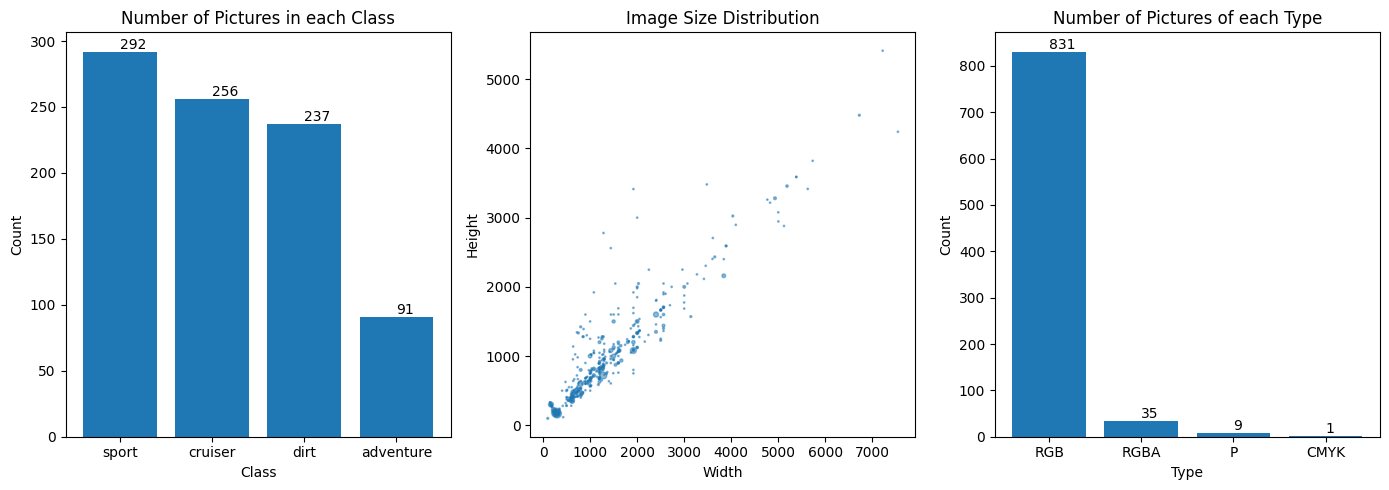

In [37]:
# Creating a single subplot for all three graphs
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
 
# Plotting the first graph for Class Counts
bars = axs[0].bar(class_counts['Class'], class_counts['Count'])
axs[0].set_title('Number of Pictures in each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=0)
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar
 
# Plotting the second graph for Size Counts
axs[1].scatter(size_counts['Width'], size_counts['Height'], s=size_counts['Count'], alpha=0.5)
axs[1].set_title('Image Size Distribution')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Height')
 
# Plotting the third graph for Type Counts
bars = axs[2].bar(type_counts['Type'], type_counts['Count'])
axs[2].set_title('Number of Pictures of each Type')
axs[2].set_xlabel('Type')
axs[2].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar
 
plt.tight_layout()
plt.show()
 


In [38]:
# Print the DataFrame
print(df)

                                                 Image    Class  Width  \
0                                       images3 23.jpg    sport    284   
1                                        images282.jpg    sport    275   
2                                        images255.jpg    sport    266   
3                                         images26.jpg    sport    168   
4                 2024-kramer-gp2-890rr-13-745x497.jpg    sport    745   
..                                                 ...      ...    ...   
871  12-Great-2019-Cruiser-Motorcycles-Under-10000-...  cruiser   1920   
872                                          img13.jpg  cruiser   2696   
873  desktop-wallpaper-star-stryker-yamaha-cruiser-...  cruiser    850   
874                                              0.jpg  cruiser   1440   
875                                         dw (9).jpg  cruiser   1000   

     Height    Image Size Type  
0       177    (284, 177)  RGB  
1       183    (275, 183)  RGB  
2       189 

In [53]:
filtered_df = df[(df['Width'] <= 500) & (df['Height'] <= 500)].reset_index()
filtered_df

,index,Image,Class,Width,Height,Image Size,Type
0,0,images3 23.jpg,sport,284,177,"(284, 177)",RGB
1,1,images282.jpg,sport,275,183,"(275, 183)",RGB
2,2,images255.jpg,sport,266,189,"(266, 189)",RGB
3,3,images26.jpg,sport,168,300,"(168, 300)",RGB
4,5,images241.jpg,sport,275,183,"(275, 183)",RGB
...,...,...,...,...,...,...,...
216,525,d5.jpg,dirt,500,287,"(500, 287)",RGB
217,529,250RX-FeaturedImage.jpg,dirt,500,500,"(500, 500)",RGB
218,575,brand-new-450cc-dirt-bike-300cc-motocross-endu...,dirt,500,407,"(500, 407)",RGB
219,626,blue-classic-chopper-motorcycle-3d-model-max-o...,cruiser,500,500,"(500, 500)",RGB


In [57]:
filtered_class_counts = filtered_df['Class'].value_counts().reset_index(name='Count')
class_counts.columns = ['Class', 'Count']

In [54]:
filtered_size_counts = filtered_df.groupby(['Width', 'Height']).size().reset_index(name='Count')
filtered_size_counts

,Width,Height,Count
0,100,100,2
1,152,330,1
2,152,331,1
3,168,299,5
4,168,300,13
5,172,293,1
6,174,289,1
7,183,275,2
8,194,260,1
9,225,225,10


In [55]:
filtered_type_counts = filtered_df['Type'].value_counts().reset_index(name='Count')
type_counts.columns = ['Type', 'Count']
filtered_type_counts

,Type,Count
0,RGB,220
1,P,1


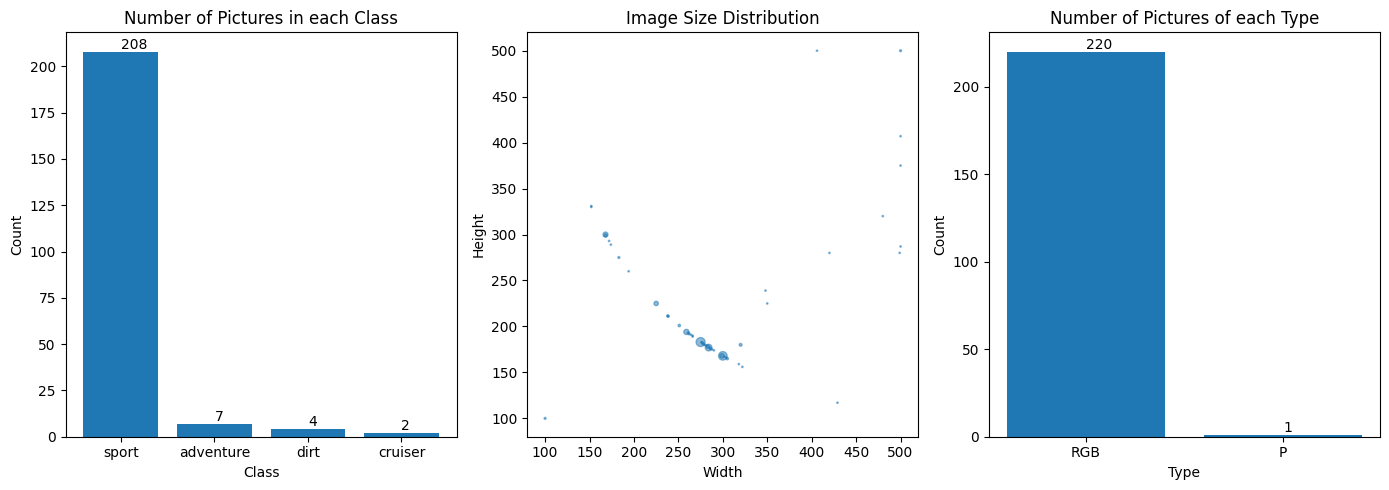

In [58]:
# Creating a single subplot for all three graphs
fig, axs = plt.subplots(1, 3, figsize=(14, 5))
 
# Plotting the first graph for Class Counts
bars = axs[0].bar(filtered_class_counts['Class'], filtered_class_counts['Count'])
axs[0].set_title('Number of Pictures in each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=0)
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar
 
# Plotting the second graph for Size Counts
axs[1].scatter(filtered_size_counts['Width'], filtered_size_counts['Height'], s=filtered_size_counts['Count'], alpha=0.5)
axs[1].set_title('Image Size Distribution')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Height')
 
# Plotting the third graph for Type Counts
bars = axs[2].bar(filtered_type_counts['Type'], filtered_type_counts['Count'])
axs[2].set_title('Number of Pictures of each Type')
axs[2].set_xlabel('Type')
axs[2].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar
 
plt.tight_layout()
plt.show()
 
